# Pymort tutorial

### contents
* [single mortgage simulation](#single-mortgage-simulation)
* [multiple mortgage simulation](#multiple-mortgage-simulation)
* [optimizing your mortgage offers](#optimizing-your-mortgage-offers)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pymort

## single mortgage simulation

[top](#contents), [next](#multiple-mortgage-simulation)

First, let's use the `Mortgage` class to simulate a single mortgage that contains to different plans with a total loan of 350,000$.

In [3]:
mort = pymort.Mortgage()
mort.add_plan(principal=100000, years=20, interest=3.0,
              track_inflation=True, description='plan1')
mort.add_plan(principal=250000, years=15, interest=1.0,
              track_inflation=False, description='plan2')
mort


Mortgage{'inflation': 0.0, 'monthly_inflation': 0.0, 'plans': [
Plan{'principal': '100000.0000', 'years': '20.0000', 'interest': '3.0000', 'monthly_interest': '0.0025', 'monthly_pay': '554.5976', 'track_inflation': '1.0000', 'description': 'plan1', 'current_balance': '100000.0000'}, 
Plan{'principal': '250000.0000', 'years': '15.0000', 'interest': '1.0000', 'monthly_interest': '0.0008', 'monthly_pay': '1496.2363', 'track_inflation': '0.0000', 'description': 'plan2', 'current_balance': '250000.0000'}]}

Next, let's simulate this mortgage, under a plausible scenario of 2% yearly inflation.

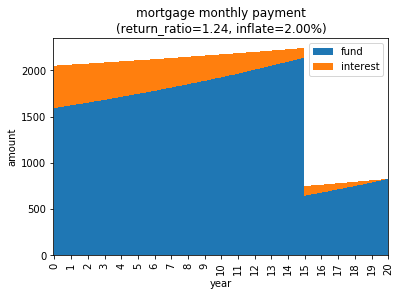

In [4]:
mort.plot(inflation=2.0)

We can see that the monthly payments increase with the years due to inflation, that after 15 years 'plan2' is complete and the payments drop to ~700$. The orange part of the plot descibes the fraction of each payment that is dedicated to cover the interest.

To get a detailed payments table use:

In [5]:
payments = mort.simulate(inflation=2.0)
payments

,fund,interest
0,1593.003619,458.746229
1,1595.344781,457.322542
2,1597.692107,455.894207
3,1600.045619,454.461204
4,1602.405340,453.023513
5,1604.771292,451.581112
6,1607.143499,450.133982
7,1609.521983,448.682103
8,1611.906769,447.225453
9,1614.297878,445.764013


## multiple mortgage simulation

[top](#contents), [next](#optimizing-your-mortgage-offers), [previous](#single-mortgage-simulation)

Given a number of offers (for example, from different banks, or for different periods of loan), we can compare them using the `MultiSim` class.

This class accepts common-separated-values files with the parameters of multiple-plan mortgages, such as the one provided in 'mortgage_table.csv'.

In [6]:
pd.read_csv('bank_offers.csv').head(6)

,mortgage_id,plan_principal,plan_years,plan_interest,plan_tracks_inflation,description
0,1,100000,10,2.0,True,fixed rate inflating
1,1,100000,10,1.0,False,prime rate
2,1,100000,10,2.8,True,adjustable rate inflating
3,2,100000,20,2.5,True,fixed rate inflating
4,2,100000,20,1.0,False,prime rate
5,2,100000,20,2.9,True,adjustable rate inflating


Each mortgage offer here (with a designated mortgage_id) contains 3 plans.

In [7]:
msim = pymort.MultiSim()
msim.add_mortgage_from_file('bank_offers.csv')
msim.morts[0]

3 offers added to simulator
total offers: 3



Mortgage{'inflation': 0.0, 'monthly_inflation': 0.0, 'plans': [
Plan{'principal': '100000.0000', 'years': '10.0000', 'interest': '2.0000', 'monthly_interest': '0.0017', 'monthly_pay': '920.1345', 'track_inflation': '1.0000', 'description': 'fixed rate inflating', 'current_balance': '100000.0000'}, 
Plan{'principal': '100000.0000', 'years': '10.0000', 'interest': '1.0000', 'monthly_interest': '0.0008', 'monthly_pay': '876.0412', 'track_inflation': '0.0000', 'description': 'prime rate', 'current_balance': '100000.0000'}, 
Plan{'principal': '100000.0000', 'years': '10.0000', 'interest': '2.8000', 'monthly_interest': '0.0023', 'monthly_pay': '956.4029', 'track_inflation': '1.0000', 'description': 'adjustable rate inflating', 'current_balance': '100000.0000'}]}

Using `MultiSim` we can simulatneously simulate all the plans for a range of inflation scenarios and compare the cost of the different offers based on the return ratio (that is, the number of dollars we pay for each dollar borrowed), and the maximal monthly payment that we will have to deal with somewhere down the road.

In addition, we may ask `MultiSim` to constrain to some maximal payment, and/or to some maximal first monthly payment. These arguments are optional.

In [8]:
return_ratio, max_pay = msim.simulate(inflation=[0, 0.5, 1, 1.5, 2], max_pay=1900, max_first_pay=1600)
return_ratio

,inflat_0_00,inflat_0_50,inflat_1_00,inflat_1_50,inflat_2_00
mortgage,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,1.231522,1.276252,1.323845,NaN,NaN
2,1.397817,1.477665,1.565549,1.662348,1.769039


The return ratio is given for each mortgage offer and for each inflation scenario.

Mortgage offers that excceed the the allowed maximal payment, or the desired first monthly payment are masked from the table.

We can utilize the table to select the best offer for each scenario.

In [9]:
return_ratio.idxmin()

inflat_0_00    1
inflat_0_50    1
inflat_1_00    1
inflat_1_50    2
inflat_2_00    2
dtype: int64

Finally, we can simulate any of these offers, as we did for the single. Let's see the most favorable one for <1% inflation.

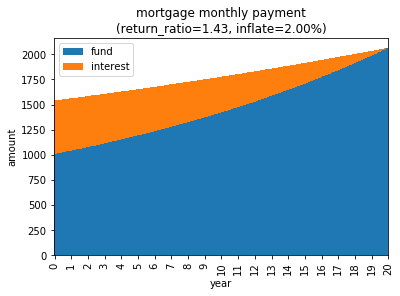

In [10]:
msim.morts[1].plot(2)

## optimizing your mortgage offers

[top](#contents), [previous](#multiple-mortgage-simulation)

We may try to use the simulation to optimize the period of years for each plan in a multi-plan mortgage. However, this can be tricky as the terms of the loan tend to change depending on its duration.

One possible solution could be the following one. Given a few offers from the bank for different periods of years - e.g., for 10, 15 and 20-year plans - we can attempt to predict what will be the interest rate of the next offer, e.g. for 17 years, or 12.

`LinearSim` builds a simple model for such predictions, and can simulate multiple combination of plans for different time periods, inflation scenarios, and under different constraints on the size of payments.

To this end, we will load only mortgage offers that were received _from the same bank_ (and hopefully follow a consistent trend that can be learned and predicted using simple linear interpolation).

After receiving the results, one may ask the bank for a new offer for any of the desired plans. **Note, that the model that underlies this simulation may generate predictions that will prove to be different from the actual final offers received from the bank.**

This simulation (as any of the others in pymort) also does not take into account the dynamics in the set annual interest, that will affect the cost of the loan. Such predictions are well beyond the scope of this package.

Let's see an example.

In [11]:
lsim = pymort.LinearSim()
lsim.add_mortgage_from_file('bank_offers.csv')

3 offers added to simulator
total offers: 3


This simulator works similarly to the previous ones, but accepts also a range of years as arguments.

In [12]:
return_ratio, max_pay = lsim.simulate(years=np.arange(15, 31),
                                      inflation=[0, 0.5, 1, 1.5, 2], max_pay=1900, max_first_pay=1600)

102.5sec


The cheapest predicted offers that meet the payment constraints for each inflation scenario are kept in the returned table. It can be seen that the year spans in the first row are expected to lead to the best return ratio. However, for an iflation rate of 1.5%, spreading part of the loan (plan_1) over a longer period while shortening the terms of the other plans results in the best predicted return ratio that does not exceed the payment limits we previously set. For an inflation rate of 2% additional adjustments must be made.

In [13]:
return_ratio

,,,inflat_0_00,inflat_0_50,inflat_1_00,inflat_1_50,inflat_2_00
plan_1,plan_2,plan_3,,,,,
16,30,16,1.200490,1.234048,1.269276,NaN,NaN
18,29,15,1.205001,1.239912,1.276641,1.315288,NaN
15,30,22,1.231195,1.272196,1.315739,1.361997,1.411157


In [14]:
max_pay

,,,inflat_0_00,inflat_0_50,inflat_1_00,inflat_1_50,inflat_2_00
plan_1,plan_2,plan_3,,,,,
16,30,16,1594.330722,1700.054645,1813.970045,1936.666261,2068.771808
18,29,15,1585.139646,1682.552767,1786.992576,1898.927331,2018.853945
15,30,22,1490.561726,1581.366803,1678.721912,1783.063545,1894.854906


In [15]:
return_ratio.idxmin()

inflat_0_00    (16, 30, 16)
inflat_0_50    (16, 30, 16)
inflat_1_00    (16, 30, 16)
inflat_1_50    (18, 29, 15)
inflat_2_00    (15, 30, 22)
dtype: object

Finally, let's compare the 20-year plan with the one proposed by the analysis using `LinearSim`.

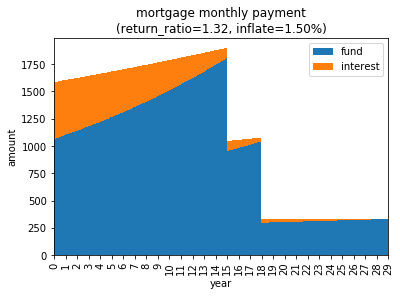

In [16]:
lsim.get_plan(18, 29, 15).plot(inflation=1.5)

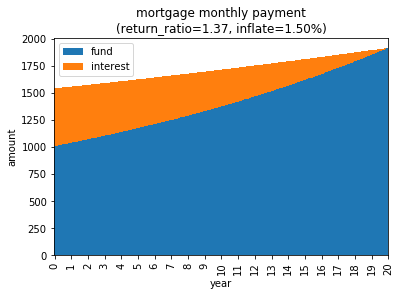

In [17]:
lsim.get_plan(20, 20, 20).plot(inflation=1.5)